# CpE Elective 3 Laboratory (LBYCPC4) <br/>
#### Computer Vision and Deep Learning Elective Track
<br/>
<hr style="border:5px solid gray">


## Activity 1: Autoencoders

### Introduction
&emsp;&emsp;&emsp;Autoencoders are a type of neural network that are trained to learn a compressed representation of input data. They are used to reduce dimensionality, denoise data, and even generate new data. The goal of training an autoencoder is to minimize the reconstruction error, meaning the difference between the original input and the reconstructed output should be as small as possible. This forces the autoencoder to learn a meaningful and efficient representation of the data.

Although reconstructing the data might seem like a trivial matter by simply copying the data forward from one layer to another, this is not possible when the number of units in the middle are constricted. In other words, the number of units in each middle layer is typically fewer than that in the input (or
output). As a result, these units hold a reduced representation of the data, and the final layer can no longer reconstruct the data exactly [1]. This general representation of the autoencoder is illustrated in Figure 1.1.

<center><img src="https://drive.google.com/uc?export=view&id=1N_RUjBNfnFI19Ll9UrMNmEg7phGRPu3W"><br/>Figure 1.1. The encoder neural network architecture [1]</center>

### Objectives
- Understand the working principle and architecture of autoencoders
- Build and train an autoencoder using deep learning framework
- Visualize the output of an autoencoder
- Assess the performance of the implemented autoencoder

### Activity
*Note: Before starting the activity, make sure to save a copy of this Colaboratory notebook first in your own Google Drive. To do so, go to File > Save a copy in Drive*

**A. Dimensionality Reduction with Autoencoders**

1. Write the code that will download the [Wine Dataset from UCI ML Repository](https://archive.ics.uci.edu/dataset/109/wine). Perform feature normalization using `MinMaxScaler` from Scikit-Learn library. Then, do a train-test split of the normalized dataset with 20% of the data for testing.

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

### --YOUR CODE HERE-- ###

# Load the Wine dataset as a Numpy array
X, y = load_wine(return_X_y=True)

# Perform train-test split with 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform feature normalization using MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Save the training data to variable X_train
# Save the testing data to variable X_test
# Save the target to variable y
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)



2. Build an autoencoder with the architecture illustrated below. Use the Keras `Sequential` object to build it.
<center><img src="https://drive.google.com/uc?export=view&id=128exLfIE21H2PVoz5w5qZn-9lESgzTFK"></center>

In [2]:
# Import functions and classes from Keras library
from keras import Input, models
from keras.models import Sequential
from keras.layers import Dense

# Create the autoencoder model based from the illustrated model plot
# Save the model as autoencoder_ann variable
### --YOUR CODE HERE-- ###

# define encoder
encoder = Sequential(
    [
        Input(shape=(13,)),
        Dense(3, activation="sigmoid", dtype='float32')
    ]
)

# define decoder 
decoder = Sequential(
    [
        Input(shape=(3,)),
        Dense(13, activation="sigmoid", dtype='float32')
    ]
)

encoder.summary()
decoder.summary()

2025-09-11 10:34:19.344196: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-11 10:34:19.417330: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-11 10:34:22.757110: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-11 10:34:23.492033: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │            42 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42 (168.00 B)

 Trainable params: 42 (168.00 B)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 13)             │            52 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52 (208.00 B)

 Trainable params: 52 (208.00 B)

 Non-trainable params: 0 (0.00 B)

3. Configure the network for training with the Adam optimizer and the loss to mean squared error. Then train the model with a batch size of 10. Use the test data for validation during training. Make sure to save the history of losses per training and validation epoch. Train the model until the validation loss is no more than 0.02.

In [3]:
# Configure the network for training using the compile method
# Set the optimizer to Adam and determine the appropriate loss function
### --YOUR CODE HERE-- ###

from tensorflow.keras.optimizers import Adam

# Compile the autoencoder model
autoencoder = models.Sequential([encoder, decoder])

autoencoder.compile(optimizer=Adam(learning_rate=1e-4), loss='mse')
autoencoder.summary()

# Assign the output to hist_autoencoder_ann variable
### --YOUR CODE HERE-- ###


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 3)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 13)             │            52 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 94 (376.00 B)

 Trainable params: 94 (376.00 B)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Train the model using X_train. Use validation with X_test
# Set the batch size to 10 and the verbosity to 2.
# Ensure the validation loss to be no greater than 0.02
# Use early stopping to determine the appropriate training epochs
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=90, restore_best_weights=True)

hist_autoencoder_ann = autoencoder.fit(X_train, X_train,
                                       epochs=2500,
                                       batch_size=10,
                                       validation_data=(X_test, X_test),
                                       callbacks=[early_stopping],
                                       verbose=2)


Epoch 1/2500
15/15 - 2s - 111ms/step - loss: 0.0556 - val_loss: 0.0519
Epoch 2/2500
15/15 - 0s - 11ms/step - loss: 0.0554 - val_loss: 0.0518
Epoch 3/2500
15/15 - 0s - 9ms/step - loss: 0.0552 - val_loss: 0.0516
Epoch 4/2500
15/15 - 0s - 12ms/step - loss: 0.0551 - val_loss: 0.0514
Epoch 5/2500
15/15 - 0s - 10ms/step - loss: 0.0549 - val_loss: 0.0513
Epoch 6/2500
15/15 - 0s - 10ms/step - loss: 0.0548 - val_loss: 0.0511
Epoch 7/2500
15/15 - 0s - 11ms/step - loss: 0.0547 - val_loss: 0.0510
Epoch 8/2500
15/15 - 0s - 12ms/step - loss: 0.0545 - val_loss: 0.0508
Epoch 9/2500
15/15 - 0s - 10ms/step - loss: 0.0544 - val_loss: 0.0507
Epoch 10/2500
15/15 - 0s - 11ms/step - loss: 0.0542 - val_loss: 0.0505
Epoch 11/2500
15/15 - 0s - 11ms/step - loss: 0.0541 - val_loss: 0.0504
Epoch 12/2500
15/15 - 0s - 11ms/step - loss: 0.0540 - val_loss: 0.0502
Epoch 13/2500
15/15 - 0s - 13ms/step - loss: 0.0538 - val_loss: 0.0501
Epoch 14/2500
15/15 - 0s - 12ms/step - loss: 0.0537 - val_loss: 0.0500
Epoch 15/2500
1

4. Plot the training and validation loss per epoch. Place appropriate plot title and axis labels.

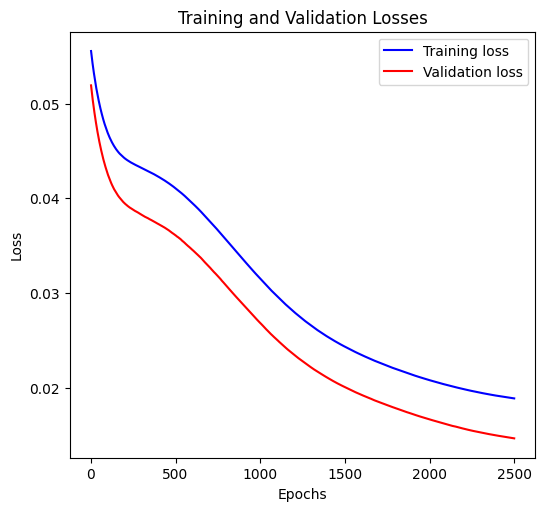

In [7]:
# Extract the losses during training and validation
losses = hist_autoencoder_ann.history["loss"]
validation_losses = hist_autoencoder_ann.history["val_loss"]
epochs = range(1, len(losses) + 1)

# Plot the history of training and validation losses
plt.figure(figsize=(10, 5), constrained_layout=True)
plt.subplot(1, 2, 1)
### --YOUR CODE HERE-- ###

plt.plot(epochs, losses, 'b', label='Training loss')
plt.plot(epochs, validation_losses, 'r', label='Validation loss')
plt.title('Training and Validation Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


5. Extract the encoder subnetwork from the autoencoder. Obtain the output of the encoder for each dataset sample.

In [6]:
# Extract the encoder subnetwork
encoder_ann = Sequential(autoencoder_ann.layers[:1])

# Obtain the output of the encoder for each dataset sample
# Save the results to X_encoded variable
# The results should include both training and testing data
### --YOUR CODE HERE-- ###


NameError: name 'autoencoder_ann' is not defined

6. Execute the code below to obtain a 3D plot of the values returned by the encoder for each dataset sample. Can you distinguish the clusters? Analyze the plot and write observations on the final report.

In [ ]:
# Create a 3D plot of the encoder predictions for each dataset point
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=45, azim=-45)
ax.scatter(
    X_encoded[:, 0],
    X_encoded[:, 1],
    X_encoded[:, 2],
    c=y,
    s=20
)

# Set titles and axis labels
ax.set_title("Encoder output")
ax.set_xlabel("Component 1")
ax.set_ylabel("Component 2")
ax.set_zlabel("Component 3")

plt.show()

7. Execute the code below to perform principal component analysis (PCA) and write the code to plot the transformed datapoints with the first three (3) PCA dimensions. Compare this plot with step A.6. Write your observations on the final report.

In [ ]:
# Import PCA from Scikit-Learn
from sklearn.decomposition import PCA

X_PCA = PCA(n_components=3).fit_transform(np.vstack((X_train, X_test)))

# Create a 3D plot of the PCA components for each dataset point
# Put appropriate title and axis labels
### --YOUR CODE HERE-- ###


8. Create another autoencoder model but with only two (2) nodes in the middle. Repeat steps A.3 to A.6. This time, create 2D plots instead of 3D plots to visualize the encoder subnetwork outputs. Is the final validation loss better than the previous model? Can the model clearly separate the targets into distinguishable clusters? Write your observations in the final report.

In [ ]:
# Define another autoencoder with 2 nodes at hidden layer
### --YOUR CODE HERE-- ###

# Configure and train the network
### --YOUR CODE HERE-- ###

# Plot the history of training and validation losses
### --YOUR CODE HERE-- ###

# Obtain the output of the encoder for each dataset sample
### --YOUR CODE HERE-- ###


**B. Building a Denoising Convolutional Autoencoder**

1. Write the code that will download and display at least ten (10) samples of the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset.

In [ ]:
# Import functions and classes
from keras.datasets import fashion_mnist
from keras.utils import to_categorical

# Load the Fashion MNIST dataset
# Rescale the pixel values to be between 0 and 1
# Save the training images and labels to x_train and y_train variables
# Save the testing images and labels to x_test and y_test variables
# Plot ten (10) images from training set in a single row
### --YOUR CODE HERE-- ###


2. Execute the code below to generate a copy of noisy images and display the images.

In [ ]:
# Apply noise to the image
x_train_noisy = x_train + 0.2*np.random.normal(loc=0, scale=1,
                                               size=x_train.shape)
x_test_noisy = x_test + 0.2*np.random.normal(loc=0, scale=1,
                                             size=x_test.shape)

# Ensure that all pixel values are within the range
x_train_noisy = np.clip(x_train_noisy, 0, 1)
x_test_noisy = np.clip(x_test_noisy, 0, 1)

# Plot ten (10) noisy images from training set in a single row
fig, axes = plt.subplots(1, 10, figsize=(10, 10),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
  ax.imshow(x_train_noisy[i], cmap='binary', interpolation='none')

3. Build a denoising autoencoder with the architecture illustrated below.
<center><img src="https://drive.google.com/uc?export=view&id=1KaLOal7SSsvdIySh5rFw3sd0CwanGQDX"></center>

In [ ]:
# Import functions and classes
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D

# Create the autoencoder model based from the illustrated model plot
# Save the model as autoencoder_cnn variable
### --YOUR CODE HERE-- ###


4. Configure the network for training with the appropriate loss function and an optimizer of your choice. Then train the model with a batch size of 100. Perform validation during training. Make sure to save the history of losses per training and validation epoch.

In [ ]:
# Configure the network for training
### --YOUR CODE HERE-- ###

# Train the model. Perform validation as well
# Set the batch size to 100 and the verbosity to 2
# Ensure the validation loss to be no greater than 0.01
# Use early stopping to determine the appropriate training epochs
# Assign the output to hist_autoencoder_cnn variable
### --YOUR CODE HERE-- ###


5. Plot the training and validation loss per epoch. Place appropriate plot title and axis labels.

In [ ]:
# Extract the losses during training and validation
losses = hist_autoencoder_cnn.history["loss"]
validation_losses = hist_autoencoder_cnn.history["val_loss"]
epochs = range(1, len(losses) + 1)

# Plot the history of training and validation losses
plt.figure(figsize=(10, 5), constrained_layout=True)
plt.subplot(1, 2, 1)
### --YOUR CODE HERE-- ###


6. Obtain the model output for at least ten (10) noisy test images. Display the input images in the first row and the output images in the second row.

In [ ]:
# Obtain model output for ten (10) input noisy images
# Display both the input noisy images and the output denoised image in two rows
# The first row contains the input noisy images
# The second row contains the output denoised images
### --YOUR CODE HERE-- ###


7. For each test image, measure the error of the reconstruction between the original (prior to applying noise) image and the denoised (model output for noisy input) image. Research an appropriate  error measure between these images and justify it in your final report. Furthermore, take the average of errors across all test images and put the value in your final report.

In [ ]:
### --YOUR CODE HERE-- ###

8. Look for at least five (5) images of clothing converted to normalized grayscale images and with the same size as the training dataset. Apply noise as done in task B.2. Obtain the predictions and display the input images in the first row and the output images in the second row. Put the results and write  observations in the final report.

In [ ]:
### --YOUR CODE HERE-- ###

***

### Machine Problems


### References

[1] Aggarwal, Charu C. *Neural Networks and Deep Learning : A Textbook*. 2nd ed. Cham: Springer International Publishing, 2023.

[2] I. Goodfellow, Y. Bengio and A. Courville, *Deep Learning*. MIT Press, 2016.

[3] *Keras 3 API documentation*. https://keras.io/api/

[4] *Wine Dataset*. https://archive.ics.uci.edu/dataset/109/wine

[5] *Fashion MNIST*. https://github.com/zalandoresearch/fashion-mnist